**Работу выполнила студентка группы 3821Б1ФИ3 Савотина Валерия**

Работа содержит домашние задания на даты 02.11.24 и 23.12.24

# Постановка задачи

Датасет содержит информацию о погодных условиях, собранную за определенный период времени. В нем представлено 96453 записи с 12 столбцами, каждый из которых описывает различные аспекты погоды в определенные моменты времени. Основные столбцы и их назначения:

- Formatted Date: Дата и время в формате ISO 8601.
- Summary: Краткое описание погодных условий.
- Precip Type: Тип осадков (дождь, снег и т.д.).
- Temperature (C): Температура в градусах Цельсия.
- Apparent Temperature (C): Ощущаемая температура.
- Humidity: Влажность в виде десятичной дроби.
- Wind Speed (km/h): Скорость ветра.
- Wind Bearing (degrees): Направление ветра.
- Visibility (km): Видимость.
- Loud Cover: Облачность.
- Pressure (millibars): Давление.
- Daily Summary: Общее описание погоды на день.

Необходимо научиться предсказывать ощущаемую температуру на основе заданных характеристик (задача регрессии).

In [3]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Загрузка и чтение данных, а также обработка пропущенных значений

Для начала требуется загрузить данные с локального диска.

In [4]:
data_raw = pd.read_csv('weatherHistory.csv')

Посмотрю на размер и вывод таблицы, а также информацию о ней (для себя).

In [5]:
data_raw.shape

(96453, 12)

In [6]:
data_raw

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Необходимо обработать пропущенные значения, убедимся, что они есть.

In [8]:
data_raw.isnull()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,False,False,False,False,False,False,False,False,False,False,False,False
96449,False,False,False,False,False,False,False,False,False,False,False,False
96450,False,False,False,False,False,False,False,False,False,False,False,False
96451,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data_raw.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


Пропущенных значений не так много, поэтому можно просто удалить эти строки из датасета.


In [10]:
data_raw = data_raw.dropna()

Также заметим, что в столбце `Loud Cover` все значения равны 0, поэтому мы можем этот столбец просто удалить, так как он не несёт никакой полезной информации.



In [11]:
data_raw["Loud Cover"].unique()

array([0.])

In [12]:
data_raw = data_raw.drop(columns="Loud Cover")

Таким образом, я обработала пропущенные значения. Убедимся, что их не осталось.

In [13]:
data_raw.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


# Обработка категориальных признаков

Выведем информацию о типах признаков.

In [14]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
 10  Daily Summary             95936 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.8+ MB


Столбец `Formatted Date` имеет тип `object`. Преобразуем дату в числовое значение, взяв за ноль 1 января 1970 года:

In [15]:
data_raw['Formatted Date'] = pd.to_datetime(data_raw['Formatted Date'])
data_raw['Formatted Date'] = data_raw['Formatted Date'].apply(lambda x: x.timestamp())

<ipython-input-15-8bdb51fb1429>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data_raw['Formatted Date'] = pd.to_datetime(data_raw['Formatted Date'])


In [16]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  float64
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
 10  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


Изменим остальные признаки типа `object` на `category`:

In [17]:
data_raw['Summary'] = data_raw['Summary'].astype('category')
data_raw['Precip Type'] = data_raw['Precip Type'].astype('category')
data_raw['Daily Summary'] = data_raw['Daily Summary'].astype('category')

In [18]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            95936 non-null  float64 
 1   Summary                   95936 non-null  category
 2   Precip Type               95936 non-null  category
 3   Temperature (C)           95936 non-null  float64 
 4   Apparent Temperature (C)  95936 non-null  float64 
 5   Humidity                  95936 non-null  float64 
 6   Wind Speed (km/h)         95936 non-null  float64 
 7   Wind Bearing (degrees)    95936 non-null  float64 
 8   Visibility (km)           95936 non-null  float64 
 9   Pressure (millibars)      95936 non-null  float64 
 10  Daily Summary             95936 non-null  category
dtypes: category(3), float64(8)
memory usage: 7.0 MB


Далее посмотрим, сколько уникальных значений содержат признаки `Summary`, `Precip Type` и `Daily Summary`.

In [19]:
data_raw['Summary'].unique()

['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'Breezy and Mostly Cloudy', ..., 'Drizzle', 'Windy and Dry', 'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain']
Length: 27
Categories (27, object): ['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
                          'Breezy and Mostly Cloudy', ..., 'Windy and Foggy', 'Windy and Mostly Cloudy',
                          'Windy and Overcast', 'Windy and Partly Cloudy']

In [20]:
data_raw['Precip Type'].unique()

['rain', 'snow']
Categories (2, object): ['rain', 'snow']

In [21]:
data_raw['Daily Summary'].unique()

['Partly cloudy throughout the day.', 'Mostly cloudy throughout the day.', 'Foggy in the evening.', 'Foggy overnight and breezy in the morning.', 'Overcast throughout the day.', ..., 'Drizzle until morning.', 'Rain throughout the day.', 'Rain until morning.', 'Light rain overnight.', 'Rain until afternoon.']
Length: 214
Categories (214, object): ['Breezy and foggy starting in the evening.', 'Breezy and foggy until morning.',
                           'Breezy and mostly cloudy overnight.', 'Breezy and partly cloudy in the afternoon.', ...,
                           'Rain throughout the day.', 'Rain until afternoon.', 'Rain until morning.',
                           'Windy in the afternoon.']

Столбец категориального типа `Precip Type` можно сделать бинарным, так как он содержит только два значения. Возьмём `snow`, равный 1, а `rain`, равный 0:

In [22]:
data_raw.replace({"Precip Type": {"snow": 1, "rain": 0}}, inplace=True)
data_raw["Precip Type"] = data_raw["Precip Type"].astype(int)

<ipython-input-22-9004cdfdf283>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_raw.replace({"Precip Type": {"snow": 1, "rain": 0}}, inplace=True)
<ipython-input-22-9004cdfdf283>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_raw.replace({"Precip Type": {"snow": 1, "rain": 0}}, inplace=True)


Для столбца Summary в одной ячейке может находится сразу несколько категорий, разделённых `and`. Разделим их и создадим столбцы по каждой из категорий, где 1 - это наличие этой категории, а 0 - её отсутствие.

In [23]:
all_summary = data_raw["Summary"]
all_summary = list(set([summary for summary_list in all_summary.str.split(" and ") for summary in summary_list]))
all_summary.sort()
print(f"Общее количество Summary: {len(all_summary)}")
print(all_summary)

Общее количество Summary: 13
['Breezy', 'Clear', 'Dangerously Windy', 'Drizzle', 'Dry', 'Foggy', 'Humid', 'Light Rain', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Rain', 'Windy']


In [24]:
new_summary = data_raw['Summary'].str.split(' and ')

new_columns = pd.DataFrame()

for summary in all_summary:
    new_columns[summary] = new_summary.apply(lambda x: 1 if isinstance(x, list) and summary in x else 0)

data_raw = pd.concat([data_raw, new_columns], axis=1)
data_raw

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),...,Drizzle,Dry,Foggy,Humid,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy
0,1.143842e+09,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,...,0,0,0,0,0,0,0,1,0,0
1,1.143846e+09,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,...,0,0,0,0,0,0,0,1,0,0
2,1.143850e+09,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,...,0,0,0,0,0,1,0,0,0,0
3,1.143853e+09,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,...,0,0,0,0,0,0,0,1,0,0
4,1.143857e+09,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.473440e+09,Partly Cloudy,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,...,0,0,0,0,0,0,0,1,0,0
96449,1.473444e+09,Partly Cloudy,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,...,0,0,0,0,0,0,0,1,0,0
96450,1.473448e+09,Partly Cloudy,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,...,0,0,0,0,0,0,0,1,0,0
96451,1.473451e+09,Partly Cloudy,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,...,0,0,0,0,0,0,0,1,0,0


In [25]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            95936 non-null  float64 
 1   Summary                   95936 non-null  category
 2   Precip Type               95936 non-null  int64   
 3   Temperature (C)           95936 non-null  float64 
 4   Apparent Temperature (C)  95936 non-null  float64 
 5   Humidity                  95936 non-null  float64 
 6   Wind Speed (km/h)         95936 non-null  float64 
 7   Wind Bearing (degrees)    95936 non-null  float64 
 8   Visibility (km)           95936 non-null  float64 
 9   Pressure (millibars)      95936 non-null  float64 
 10  Daily Summary             95936 non-null  category
 11  Breezy                    95936 non-null  int64   
 12  Clear                     95936 non-null  int64   
 13  Dangerously Windy         95936 non-null  int64   


В столбце `Daily Summary` слишком много различных категорий. Будем считать, что это произвольный текст, поэтому можно пренебречь им, и просто удалим этот столбец.

In [26]:
data_raw = data_raw.drop(columns="Daily Summary")

In [27]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            95936 non-null  float64 
 1   Summary                   95936 non-null  category
 2   Precip Type               95936 non-null  int64   
 3   Temperature (C)           95936 non-null  float64 
 4   Apparent Temperature (C)  95936 non-null  float64 
 5   Humidity                  95936 non-null  float64 
 6   Wind Speed (km/h)         95936 non-null  float64 
 7   Wind Bearing (degrees)    95936 non-null  float64 
 8   Visibility (km)           95936 non-null  float64 
 9   Pressure (millibars)      95936 non-null  float64 
 10  Breezy                    95936 non-null  int64   
 11  Clear                     95936 non-null  int64   
 12  Dangerously Windy         95936 non-null  int64   
 13  Drizzle                   95936 non-null  int64   


In [28]:
data_raw

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),...,Drizzle,Dry,Foggy,Humid,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy
0,1.143842e+09,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,...,0,0,0,0,0,0,0,1,0,0
1,1.143846e+09,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,...,0,0,0,0,0,0,0,1,0,0
2,1.143850e+09,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,...,0,0,0,0,0,1,0,0,0,0
3,1.143853e+09,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,...,0,0,0,0,0,0,0,1,0,0
4,1.143857e+09,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.473440e+09,Partly Cloudy,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,...,0,0,0,0,0,0,0,1,0,0
96449,1.473444e+09,Partly Cloudy,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,...,0,0,0,0,0,0,0,1,0,0
96450,1.473448e+09,Partly Cloudy,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,...,0,0,0,0,0,0,0,1,0,0
96451,1.473451e+09,Partly Cloudy,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,...,0,0,0,0,0,0,0,1,0,0


Таким образом, данные были обработаны, все текстовые признаки были либо заменены числовыми, либо удалены в силу неинформативности, либо удалены с использованием метода бинаризации.

# Визуализация данных и вычисление основных характеристик

Далее, когда данные обработаны, нужно визуализировать их и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.).

In [29]:
data_raw[["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)",
          "Visibility (km)", "Pressure (millibars)"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0.005,-10.000000,0.24,0.000000,0.0,0.1610,0.000
0.010,-7.755556,0.27,0.000000,0.0,0.1610,0.000
0.050,-2.777778,0.35,2.527700,10.0,2.0125,1003.230
0.100,-0.138889,0.43,3.203900,24.0,4.0250,1007.085
0.500,12.033333,0.78,9.933700,180.0,10.0464,1016.420
0.900,24.922222,0.95,20.414800,329.0,15.8263,1026.590
0.950,27.794444,0.97,24.455900,341.0,16.1000,1030.180
0.990,32.755556,1.00,32.892300,356.0,16.1000,1037.290
0.995,33.933333,1.00,35.494865,358.0,16.1000,1038.860


Можно заметить, что есть такие значения `Pressure (millibars)` и `Visibility (km)`, которые равны 0, а такого быть не может. Удалим эти строки.

In [30]:
data_raw = data_raw[data_raw['Pressure (millibars)'] != 0.0]
data_raw = data_raw[data_raw['Visibility (km)'] != 0.0]

data_raw.reset_index(drop=True, inplace=True)

In [31]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94486 entries, 0 to 94485
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            94486 non-null  float64 
 1   Summary                   94486 non-null  category
 2   Precip Type               94486 non-null  int64   
 3   Temperature (C)           94486 non-null  float64 
 4   Apparent Temperature (C)  94486 non-null  float64 
 5   Humidity                  94486 non-null  float64 
 6   Wind Speed (km/h)         94486 non-null  float64 
 7   Wind Bearing (degrees)    94486 non-null  float64 
 8   Visibility (km)           94486 non-null  float64 
 9   Pressure (millibars)      94486 non-null  float64 
 10  Breezy                    94486 non-null  int64   
 11  Clear                     94486 non-null  int64   
 12  Dangerously Windy         94486 non-null  int64   
 13  Drizzle                   94486 non-null  int6

Рассмотрим некоторые признаки на наличие выбросов:

<Axes: >

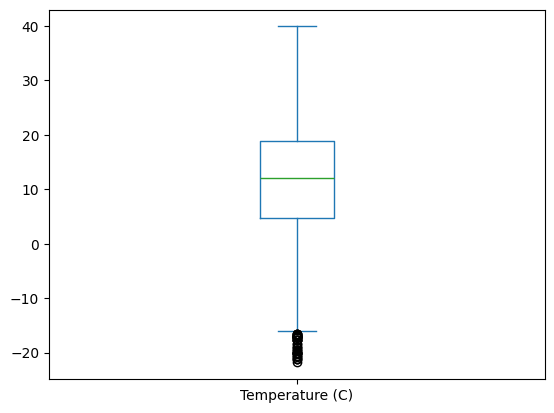

In [32]:
data_raw['Temperature (C)'].plot(kind='box')

<Axes: >

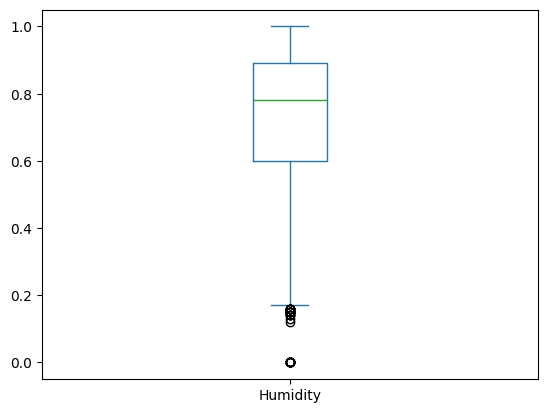

In [33]:
data_raw['Humidity'].plot(kind='box')

<Axes: >

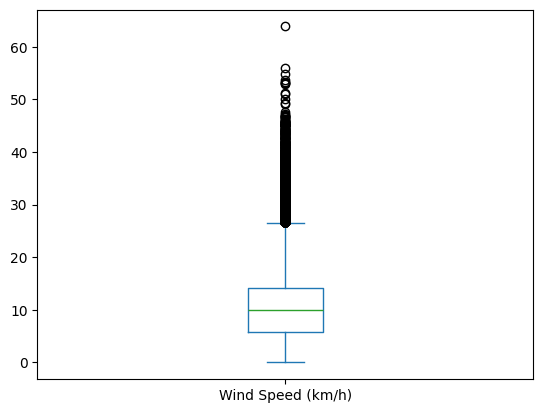

In [34]:
data_raw['Wind Speed (km/h)'].plot(kind='box')

<Axes: >

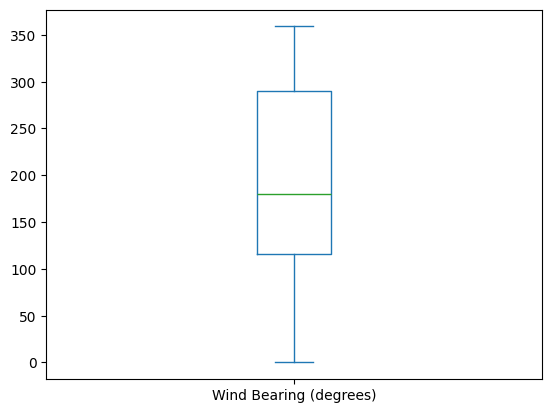

In [35]:
data_raw['Wind Bearing (degrees)'].plot(kind='box')

<Axes: >

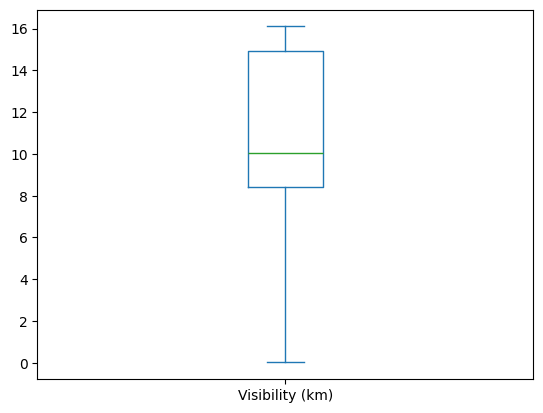

In [36]:
data_raw['Visibility (km)'].plot(kind='box')

Из так называемых "ящиков с усами" видно, что в столбцах `Humidity` и `Wind Speed (km/h)` довольно много выбросов. Удалим строки с этими признаками: для `Humidity` удалим объекты, выходящие за пределы квантиля 0.005, а для `Wind Speed (km/h)` - объекты, выходящие за пределы квантиля 0.95.

In [37]:
data_raw[["Humidity","Wind Speed (km/h)"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Humidity,Wind Speed (km/h)
0.005,0.24,0.0000
0.010,0.27,0.0000
0.050,0.35,2.5438
0.100,0.42,3.2039
0.500,0.78,9.9176
0.900,0.95,20.3826
0.950,0.97,24.3754
0.990,1.00,32.7635
0.995,1.00,35.4200


In [38]:
rows_to_drop = data_raw[(data_raw['Wind Speed (km/h)'] > data_raw['Wind Speed (km/h)'].quantile(0.95)) |
                        (data_raw['Humidity'] < data_raw['Humidity'].quantile(0.005))].index
new_data = data_raw.drop(rows_to_drop)
new_data.shape

(89446, 23)

<Axes: >

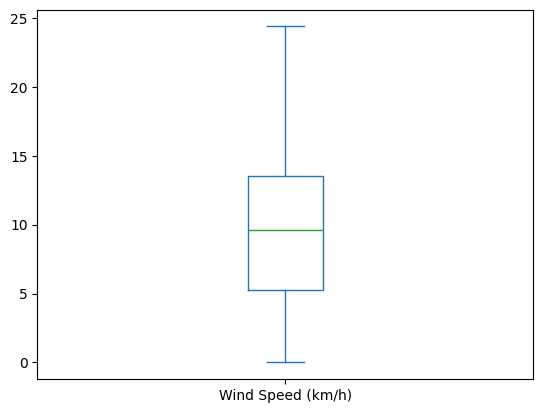

In [39]:
new_data['Wind Speed (km/h)'].plot(kind='box')

<Axes: >

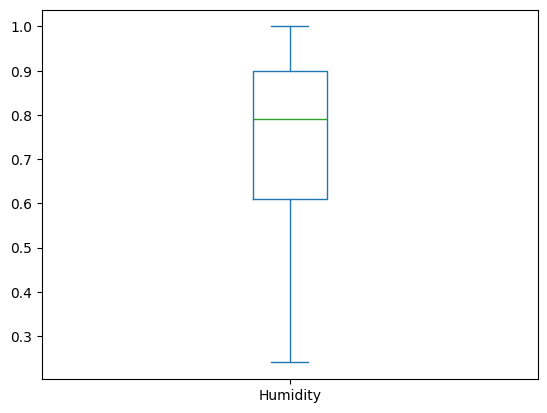

In [40]:
new_data['Humidity'].plot(kind='box')

In [41]:
new_data.describe()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,...,Drizzle,Dry,Foggy,Humid,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy
count,8.944600e+04,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.0,...,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.0
mean,1.309419e+09,0.112358,11.993906,11.008287,0.740679,9.811985,185.923820,10.373891,1017.048960,0.0,...,0.000402,0.000816,0.076594,0.000693,0.000581,0.297845,0.172853,0.341826,0.000045,0.0
std,1.001756e+08,0.315809,9.576918,10.654060,0.193263,5.499778,107.155966,4.199727,7.639422,0.0,...,0.020058,0.028557,0.265947,0.026319,0.024104,0.457313,0.378122,0.474324,0.006687,0.0
min,1.136070e+09,0.000000,-21.822222,-26.227778,0.240000,0.000000,0.000000,0.016100,974.780000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.222201e+09,0.000000,4.544444,2.444444,0.610000,5.248600,111.000000,8.194900,1012.360000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.309142e+09,0.000000,12.133333,12.133333,0.790000,9.579500,179.000000,10.046400,1016.700000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.396252e+09,0.000000,18.888889,18.888889,0.900000,13.507900,288.000000,14.908600,1021.287500,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,1.483222e+09,1.000000,37.872222,39.344444,1.000000,24.375400,359.000000,16.100000,1046.380000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


В таблице выше можно посмотреть среднее значение для каждого признака. Например, `Temperature (C)` в среднем принимает значение, равное примерно 12. Также по ней можно вычислить разброс (разницу между минимальным и максимальным значением), я сделаю это ниже:

In [42]:
ranges = new_data.select_dtypes(include=['number']).apply(lambda x: x.max() - x.min())
print(ranges)

Formatted Date              3.471516e+08
Precip Type                 1.000000e+00
Temperature (C)             5.969444e+01
Apparent Temperature (C)    6.557222e+01
Humidity                    7.600000e-01
Wind Speed (km/h)           2.437540e+01
Wind Bearing (degrees)      3.590000e+02
Visibility (km)             1.608390e+01
Pressure (millibars)        7.160000e+01
Breezy                      0.000000e+00
Clear                       1.000000e+00
Dangerously Windy           0.000000e+00
Drizzle                     1.000000e+00
Dry                         1.000000e+00
Foggy                       1.000000e+00
Humid                       1.000000e+00
Light Rain                  1.000000e+00
Mostly Cloudy               1.000000e+00
Overcast                    1.000000e+00
Partly Cloudy               1.000000e+00
Rain                        1.000000e+00
Windy                       0.000000e+00
dtype: float64


У признаков `Dangerously Windy`, `Breezy` и `Windy` разброс равен 0. Видимо, при удалении выбросов для `Wind Speed (km/h)` удалились все те строки, где значения этих признаков равны 1. Поэтому эти столбцы не несут никакой полезной информации, и их можно удалить.

In [43]:
new_data["Dangerously Windy"].unique(), new_data["Breezy"].unique(), new_data["Windy"].unique()

(array([0]), array([0]), array([0]))

In [44]:
new_data = new_data.drop(columns = ["Dangerously Windy", "Breezy", "Windy"])

Теперь построим корреляционную матрицу. Поставим numeric_only = True, чтобы для построения учитывать только числовые значения.

In [45]:
corr_mat = new_data.corr(numeric_only = True)
corr_mat

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Dry,Foggy,Humid,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain
Formatted Date,1.000000,-0.064602,0.040507,0.040111,0.039648,-0.004861,-0.022757,0.117764,-0.025539,-0.080125,0.030352,-0.002354,-0.006944,0.003204,0.031742,0.063923,0.008456,-0.014562,0.011193
Precip Type,-0.064602,1.000000,-0.567588,-0.570520,0.237933,-0.076387,-0.032831,-0.323386,0.308777,0.015381,-0.007139,-0.010168,0.279704,-0.009370,-0.008581,-0.091991,0.068142,-0.131683,-0.002379
Temperature (C),0.040507,-0.567588,1.000000,0.993704,-0.640883,0.041123,0.025884,0.406158,-0.331407,-0.001648,-0.003116,0.044395,-0.317602,0.025185,-0.005343,0.047202,-0.213298,0.303450,-0.002095
Apparent Temperature (C),0.040111,-0.570520,0.993704,1.000000,-0.615426,-0.019212,0.026390,0.397758,-0.314124,0.004689,-0.002650,0.040967,-0.303344,0.025075,-0.005916,0.044299,-0.219365,0.298982,-0.002032
Humidity,0.039648,0.237933,-0.640883,-0.615426,1.000000,-0.219583,0.012011,-0.378718,0.041320,-0.005701,0.014321,-0.070010,0.314747,0.017404,0.018347,-0.038723,0.237786,-0.325654,0.007330
Wind Speed (km/h),-0.004861,-0.076387,0.041123,-0.019212,-0.219583,1.000000,0.075916,0.101303,-0.219391,-0.138020,-0.001052,0.005174,-0.147112,-0.001665,0.019935,0.108900,0.113170,-0.022934,-0.001257
Wind Bearing (degrees),-0.022757,-0.032831,0.025884,0.026390,0.012011,0.075916,1.000000,0.048210,-0.068297,-0.027238,-0.000220,0.009995,-0.044805,-0.005361,0.004363,0.032411,-0.011623,0.020603,0.007587
Visibility (km),0.117764,-0.323386,0.406158,0.397758,-0.378718,0.101303,0.048210,1.000000,-0.169631,0.127319,-0.009270,0.001352,-0.604178,-0.002953,-0.016434,0.113931,-0.129420,0.249553,-0.009437
Pressure (millibars),-0.025539,0.308777,-0.331407,-0.314124,0.041320,-0.219391,-0.068297,-0.169631,1.000000,0.132575,-0.005756,0.001207,0.170360,-0.014191,-0.022113,-0.106003,-0.099764,0.000325,-0.002560
Clear,-0.080125,0.015381,-0.001648,0.004689,-0.005701,-0.138020,-0.027238,0.127319,0.132575,1.000000,-0.007043,-0.010031,-0.101083,-0.009244,-0.008465,-0.228590,-0.160445,-0.252937,-0.002347


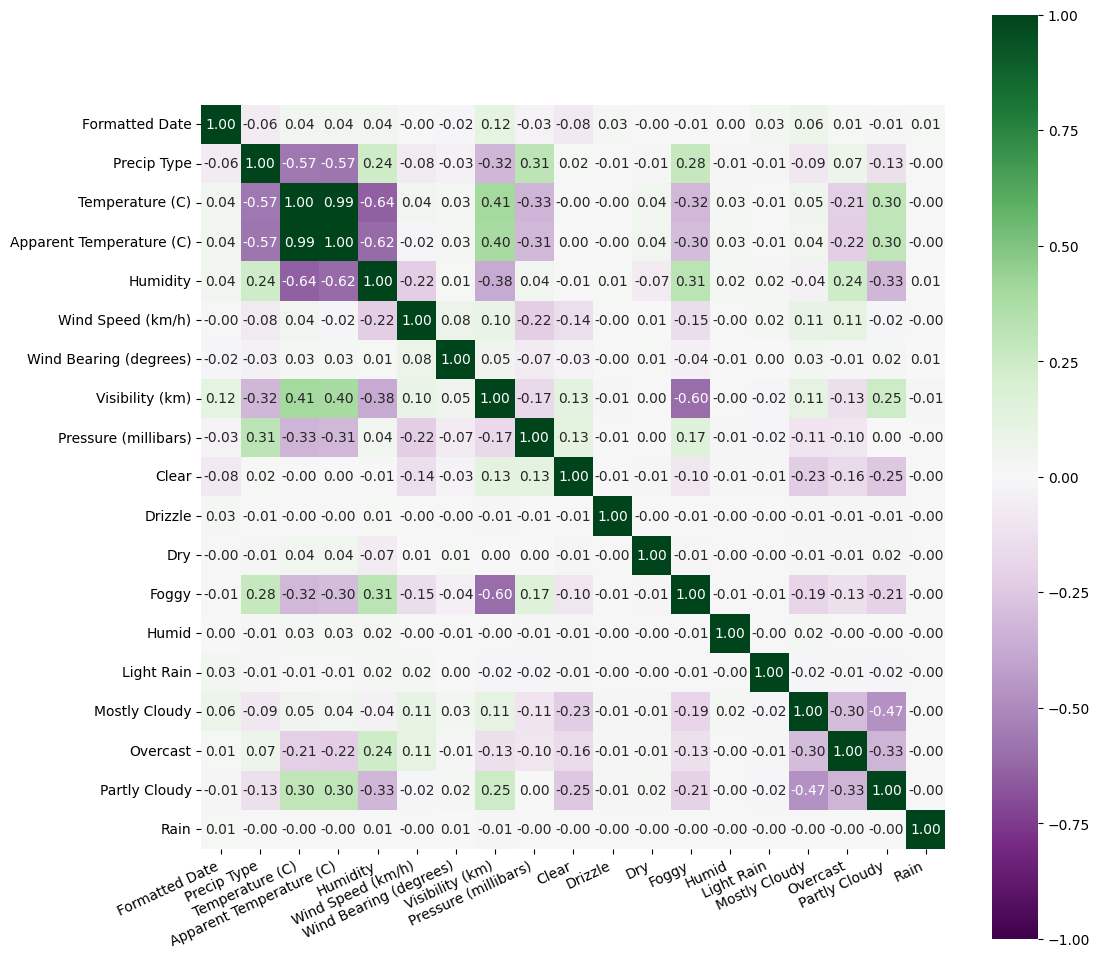

In [46]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='PRGn')
plt.xticks(rotation=25, ha='right')
plt.show()

По данной матрице можно заметить, что положительную корреляцию, близкую к единице, имеют признаки `Apparent Temperature (C)` & `Temperature (C)`, так как ощущаемая температура напрямую зависит от реальной температуры.

Немного слабее коррелируют `Temperature (C)` & `Visibility (km)` и `Apparent Temperature (C)` & `Visibility (km)`, их значения ближе всех находятся к 0.5.

Отрицательную корреляцию имеют следующие признаки: `Precip Type` & `Temperature (C)`, `Precip Type` & `Apparent Temperature (C)`, `Visibility (km)` & `Foggy`, `Apparent Temperature (C)` & `Humidity`, `Temperature (C)` & `Humidity`. Наименьшее отрицательное значение между последней парой, оно равняется -0.63.

Если на пересечении двух признаков значение корреляции равно 0, то эти признаки друг от друга не зависят, например `Dry` & `Light Rain`.

Построим графики выше приведённых примеров, чтобы по ним проследить зависимость значений.

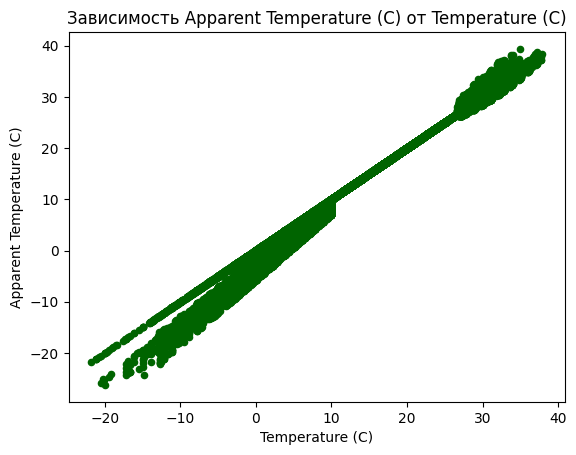

In [47]:
new_data.plot(kind='scatter', x='Temperature (C)', y='Apparent Temperature (C)', color = 'darkgreen')
plt.title('Зависимость Apparent Temperature (C) от Temperature (C)')
plt.show()

При низких показателях термометра температура зачастую кажется ниже, чем она есть на самом деле. При комфортных значениях (от 10 до 28 градусов) - ощущения совпадают с цифрами на градуснике, а при высоких показателях - снова происходит разница между ощущениями и реальностью (кажется, что температура выше, чем в действительности).

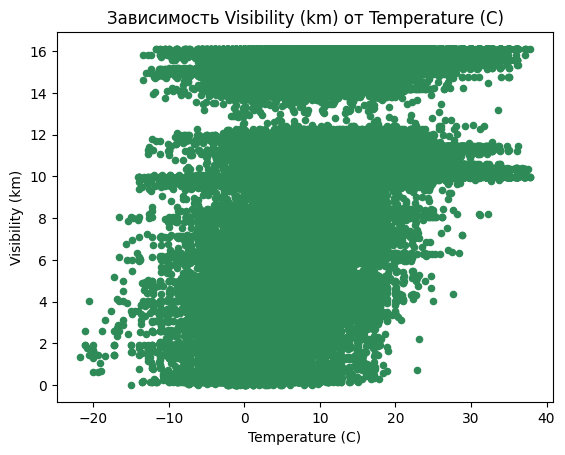

In [48]:
new_data.plot(kind='scatter', x='Temperature (C)', y='Visibility (km)', color = 'seagreen')
plt.title('Зависимость Visibility (km) от Temperature (C)')
plt.show()

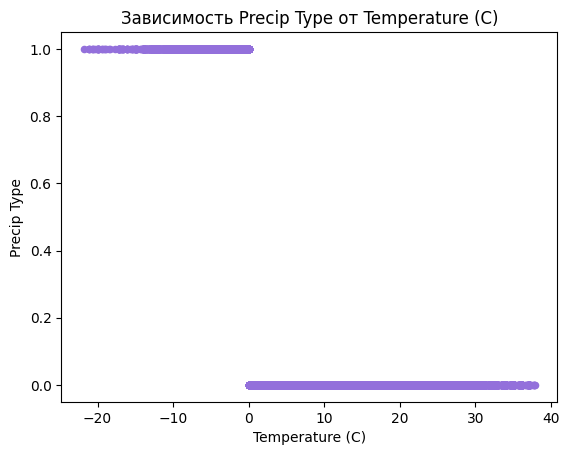

In [49]:
new_data.plot(kind='scatter', x='Temperature (C)', y='Precip Type', color = 'mediumpurple')
plt.title('Зависимость Precip Type от Temperature (C)')
plt.show()

При отрицательных значениях температуры выпадает снег, а при неотрицательных - идёт дождь.

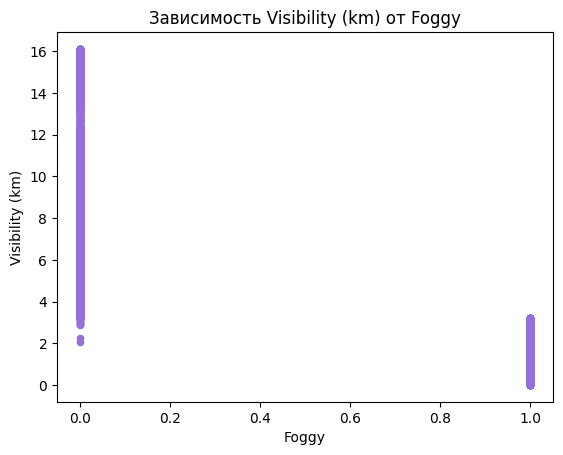

In [50]:
new_data.plot(kind='scatter', x='Foggy', y='Visibility (km)', color = 'mediumpurple')
plt.title('Зависимость Visibility (km) от Foggy')
plt.show()

При отсутствии тумана видимость лучше, чем когда туман есть.

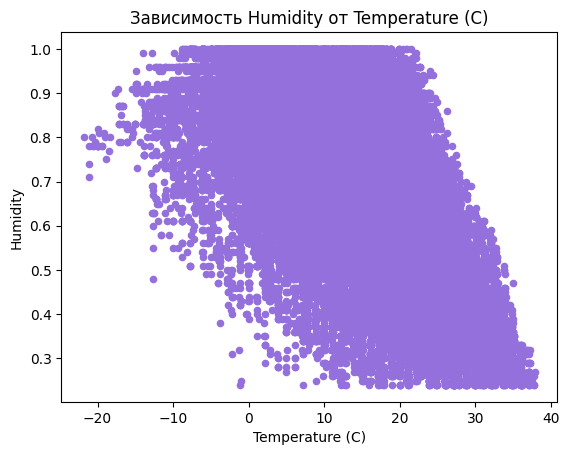

In [51]:
new_data.plot(kind='scatter', x='Temperature (C)', y='Humidity', color = 'mediumpurple')
plt.title('Зависимость Humidity от Temperature (C)')
plt.show()

С увеличением температуры влажность воздуха уменьшается, а с уменьшением - увеличивается. То есть, при значениях температуры 23-24 градуса и выше влажность воздуха уже не сможет принять максимальное значение.

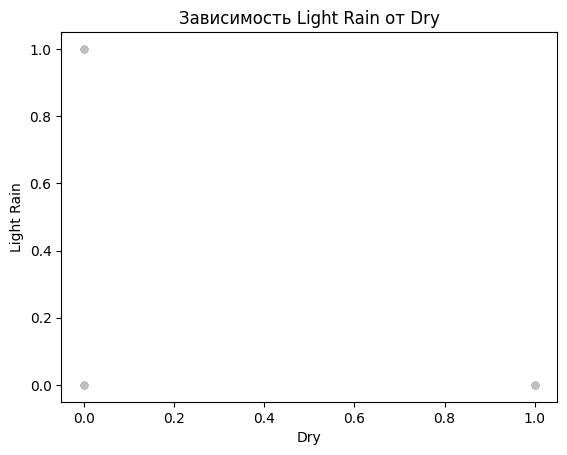

In [52]:
new_data.plot(kind='scatter', x='Dry', y='Light Rain', color = "silver")
plt.title("Зависимость Light Rain от Dry")
plt.show()

Засушливая погода и лёгкий дождик не зависят друг от друга. Дождь может как быть, так и не быть при засушливой погоде. Аналогично и обратное утверждение.

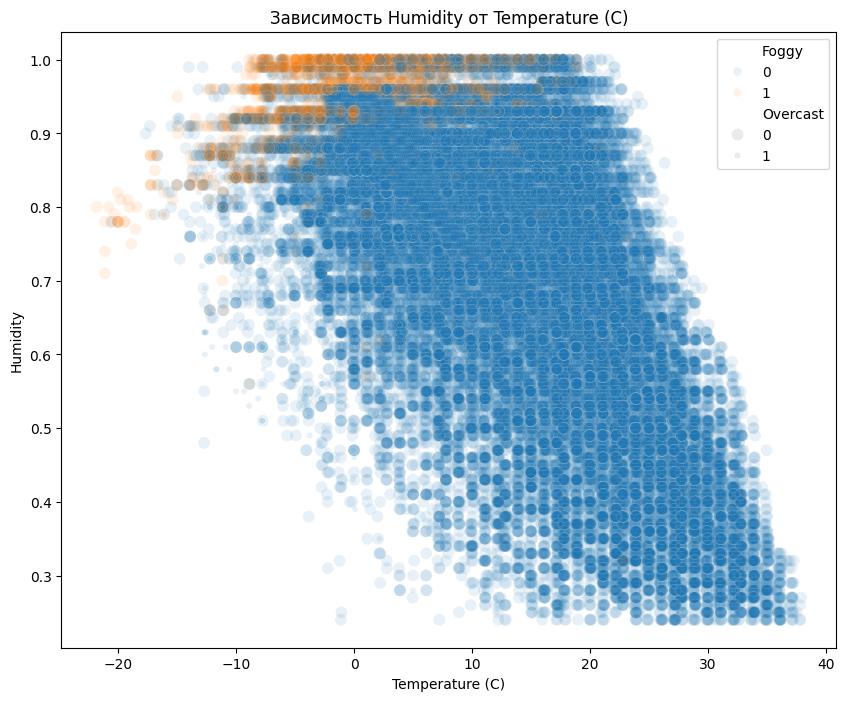

In [53]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Temperature (C)', y='Humidity', size='Overcast', hue='Foggy', data=new_data, alpha=0.1)
plt.title('Зависимость Humidity от Temperature (C)')
plt.show()

В диаграмме, изображённой выше, цвет маркеров соответствует наличию туманности 'Foggy', а размер - наличию пасмурной погоды `Overcast`. Она показывает зависимость влажности воздуха `Humidity` от температуры `Temperature (C)`.

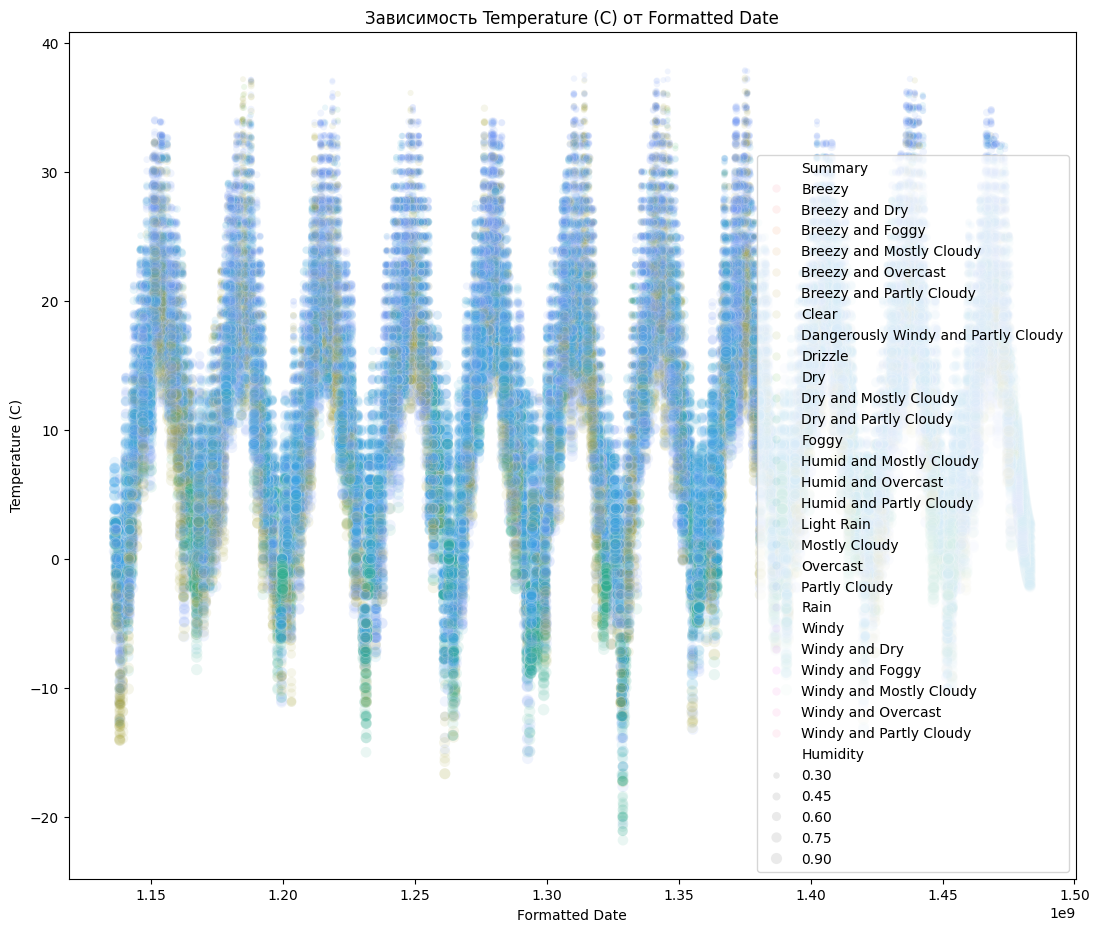

In [54]:
plt.figure(figsize = (13, 11))
sns.scatterplot(x='Formatted Date', y='Temperature (C)', size='Humidity', hue='Summary', data=new_data, alpha=0.1)
plt.title('Зависимость Temperature (C) от Formatted Date')
plt.show()

На графике, изображённом выше, цвет маркеров соответствует погоде 'Summary', а размер - значению влажности воздуха `Humidity`. Он показывает зависимость температуры `Temperature (C)` от даты `Formatted Date`.

# Нормализация данных

Нормализация данных является важным этапом в подготовке данных для обучения моделей машинного обучения, так как может ускорить обучение и лучшить качество модели. Существует несколько способов нормализации. Я воспользуюсь способом стандартизации.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_data = new_data.drop(columns = "Summary")
norm_data = pd.DataFrame(scaler.fit_transform(norm_data), columns=norm_data.columns)
norm_data

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Dry,Foggy,Humid,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain
0,-1.652871,-0.355782,-0.263310,-0.339722,0.772634,0.783257,0.607307,1.298284,-0.251193,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687
1,-1.652835,-0.355782,-0.275492,-0.354844,0.617404,0.809604,0.681965,1.298284,-0.185743,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687
2,-1.652799,-0.355782,-0.273172,-0.153042,0.772634,-1.069792,0.168691,1.091270,-0.145164,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,1.535401,-0.457138,-0.720663,-0.006687
3,-1.652763,-0.355782,-0.386872,-0.475300,0.462174,0.780329,0.775287,1.298284,-0.083640,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687
4,-1.652728,-0.355782,-0.338143,-0.378310,0.462174,0.224122,0.681965,1.298284,-0.070550,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,1.535401,-0.457138,-0.720663,-0.006687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89441,1.637349,-0.355782,1.464233,1.408708,-1.607556,0.215340,-1.445787,1.363456,-0.351987,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687
89442,1.637385,-0.355782,1.314567,1.274174,-1.348839,0.051405,-1.548442,1.233113,-0.247266,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687
89443,1.637421,-0.355782,1.048880,1.035348,-0.934893,-0.150586,-1.455119,1.363456,-0.181816,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687
89444,1.637457,-0.355782,0.994931,0.986853,-0.727920,0.130445,-1.548442,1.363456,-0.143855,-0.350978,-0.020066,-0.02858,-0.288005,-0.026337,-0.024118,-0.651296,-0.457138,1.387610,-0.006687


# Разбиение данных на обучающую и тестовую выборки

Для предсказания значения температуры будем использовать все входные признаки.

In [56]:
norm_data.isnull().sum()

,0
Formatted Date,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0
Clear,0


Так как не интересно предсказывать ощущаемую температуру на основе реальной температуры, удалим ощущаемую температуру и будем пытаться предсказать реальную температуру.

In [57]:
norm_data = norm_data.drop(columns=['Apparent Temperature (C)'])

X = norm_data.drop(columns=['Temperature (C)'])
y = norm_data['Temperature (C)']

In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
type(y)

pandas.core.series.Series

Данные нужно разбить на обучающую и тестовую выборки в пропорции 7:3 (70% - обучающая выборка, 30% - тестовая):

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (62612, 17) (62612,)
Размер тестовой выборки: (26834, 17) (26834,)


# Запуск регрессии и вычисление ошибки на обучающей и тестовой выборках.

## Линейная регрессия

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.5818627409045919
RMSE_test - 0.5832082497928608
R2_train - 0.6609320971132024
R2_test - 0.6609900536227908



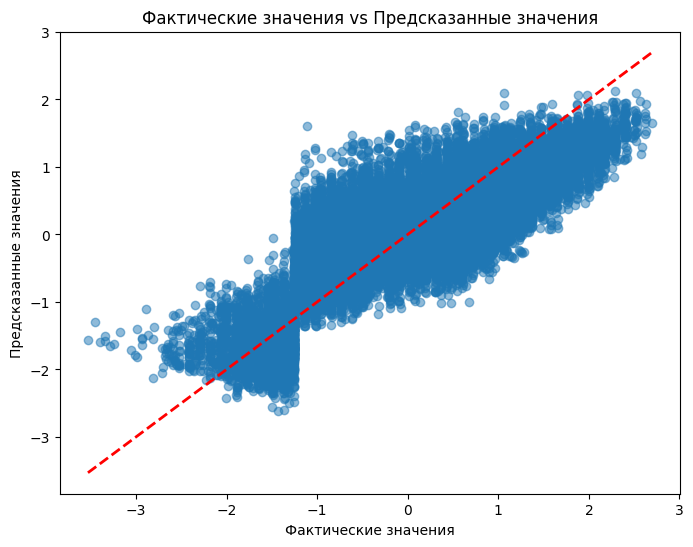

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

## Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.39538505305643273
RMSE_test - 0.4918800871808638
R2_train - 0.8434381017735658
R2_test - 0.7588520325941515



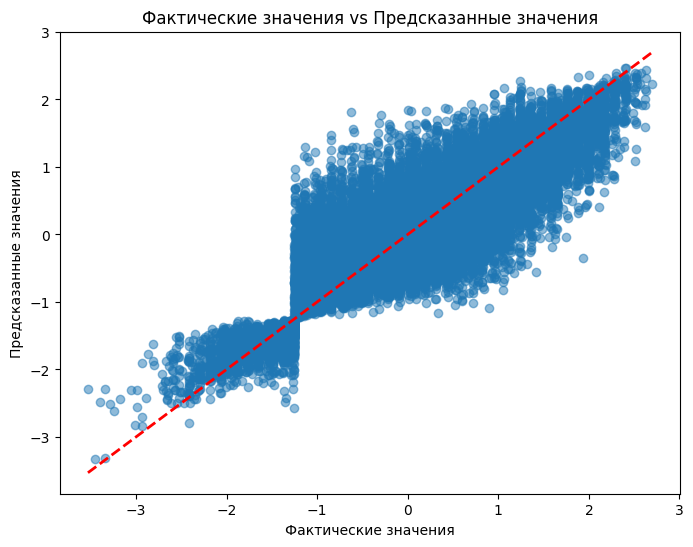

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

## Случайный лес (Random Forest)

In [65]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.1108474161265561
RMSE_test - 0.2953586974863487
R2_train - 0.9876945717761983
R2_test - 0.9130509880413494



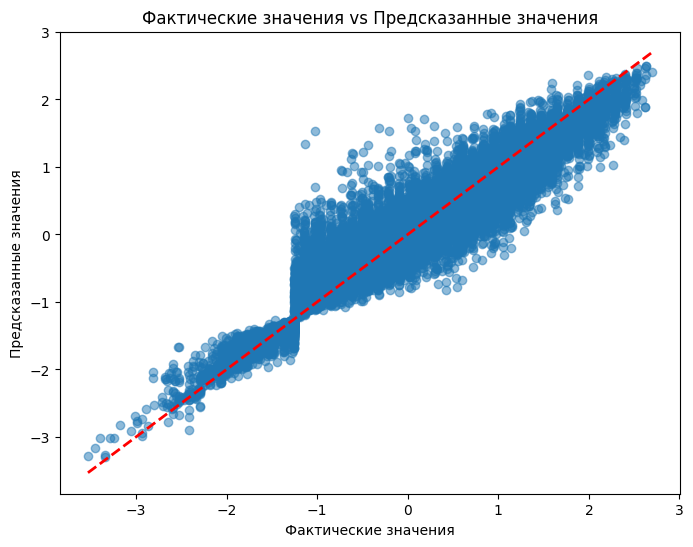

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

Благодаря методу случайный лес можно получить оценки "важности" признаков. Чем значение больше, тем признак важнее.

In [67]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

,0
Humidity,3.693540e-01
Precip Type,2.375021e-01
Formatted Date,1.519362e-01
Pressure (millibars),1.016081e-01
Visibility (km),5.880439e-02
Wind Speed (km/h),3.790374e-02
Wind Bearing (degrees),2.845134e-02
Overcast,6.390316e-03
Mostly Cloudy,3.294311e-03
Partly Cloudy,2.558032e-03


Визуализируем эти данные на диаграмме:

Text(0, 0.5, 'Признак')

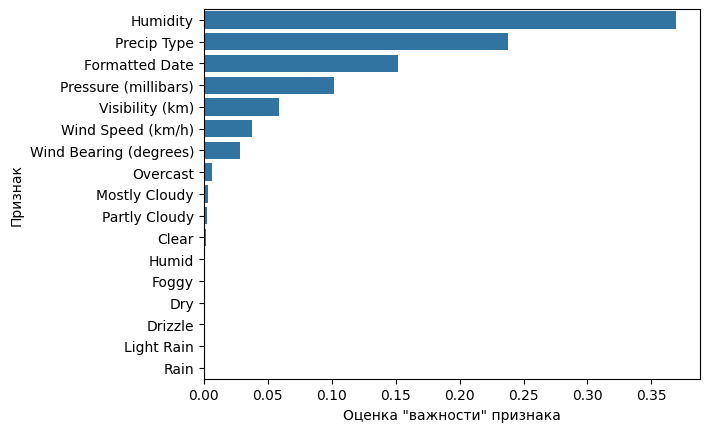

In [68]:
sns.barplot(y=importances.index, x=importances, orient="h")
plt.xlabel('Оценка "важности" признака')
plt.ylabel('Признак')

# Подбор гиперпараметров

Подберём гипермараметры для kNN и заново запустим регрессию.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ppl = Pipeline([('fit', KNeighborsRegressor())])

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 20, 30, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.2437107775405445, {'fit__n_neighbors': 10})

Добавим график зависимости MSE от гиперпараметра для kNN.

Text(0, 0.5, 'MSE')

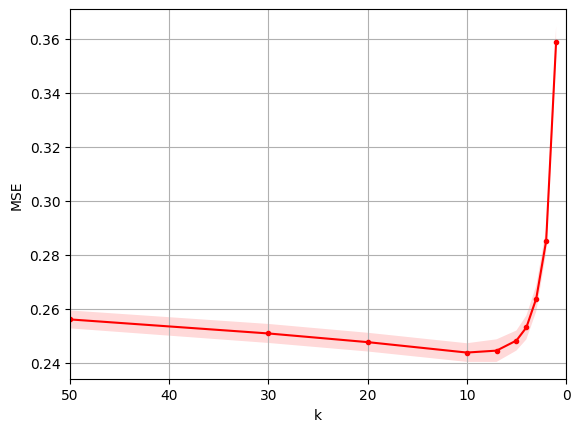

In [ ]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')

In [ ]:
model = KNeighborsRegressor(n_neighbors=model.best_params_['fit__n_neighbors'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.4382701240716929
RMSE_test - 0.48928562472058523
R2_train - 0.807633555998658
R2_test - 0.7613892336123953



Подберём гипермараметры для случайного леса и заново запустим регрессию

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ppl = Pipeline([('fit', RandomForestRegressor())])

n_arr = np.array([50, 100, 150, 200])

params = {
    'fit__n_estimators': n_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.09749466356815631, {'fit__n_estimators': 200})

Добавим график зависимости MSE от гиперпараметра для случайного леса

Text(0, 0.5, 'MSE')

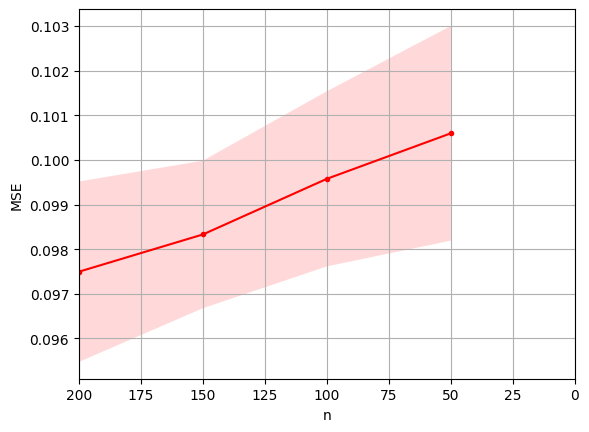

In [ ]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(n_arr, MSE_arr, 'r.-')
plt.fill_between(n_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(n_arr), 0])
plt.grid()
plt.xlabel('n')
plt.ylabel('MSE')

In [ ]:
model = RandomForestRegressor(n_estimators=model.best_params_['fit__n_estimators'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.1084465572142718
RMSE_test - 0.292522392820116
R2_train - 0.9882218488873006
R2_test - 0.9147128980121354



# Итоги по задаче регрессии

Я применила три различных модели регрессии (линейная регрессия, метод k ближайших соседей (kNN) и случайный лес), и получила следующие результаты:

## Сравнение моделей до оптимизации гиперпараметров:

### Линейная регрессия:

RMSE_train: 0.582, RMSE_test: 0.583
R2_train: 0.661, R2_test: 0.661

Линейная регрессия показывает умеренные результаты с низкой точностью (R² примерно 66%) и достаточно высоким RMSE. Это говорит о том, что модель не способна в полной мере объяснить вариацию температуры на основе входных данных.
### kNN:

RMSE_train: 0.395, RMSE_test: 0.492
R2_train: 0.843, R2_test: 0.759

kNN существенно улучшает качество модели по сравнению с линейной регрессией. Однако модель все еще склонна к некоторой недообученности на тестовых данных (R² снижается с 84% на обучающей выборке до 76% на тестовой).
### Случайный лес:

RMSE_train: 0.109, RMSE_test: 0.292
R2_train: 0.988, R2_test: 0.915

Случайный лес показал наилучшие результаты, демонстрируя отличную способность объяснять вариацию температуры (R² около 98% на обучающей и 91% на тестовой выборках). Однако высокая разница между R2_train и R2_test может указывать на переобучение.

## Сравнение моделей после оптимизации гиперпараметров:

### kNN с оптимальным количеством соседей:

RMSE_train: 0.438, RMSE_test: 0.489
R2_train: 0.808, R2_test: 0.761

Подбор оптимального количества соседей для kNN немного уменьшил RMSE на тестовых данных, но модель все еще демонстрирует умеренную производительность с R² около 76%.
### Случайный лес с оптимальным количеством деревьев:

RMSE_train: 0.108, RMSE_test: 0.292
R2_train: 0.988, R2_test: 0.915

Оптимизация случайного леса улучшила точность на тестовых данных, слегка снизив RMSE и повысив R² до 91.5%. Модель осталась самой мощной среди всех рассмотренных.

## Заключение:
Случайный лес показал наилучшие результаты как до, так и после оптимизации гиперпараметров. Он эффективно моделирует зависимость температуры от других признаков, однако имеет склонность к переобучению. Слегка улучшенное качество после оптимизации подтверждает, что случайный лес подходит для этой задачи. kNN также демонстрирует достойные результаты, хотя и уступает случайному лесу. Оптимизация количества соседей немного повысила ее производительность. Линейная регрессия оказалась наименее точной моделью, что может свидетельствовать о нелинейной природе данных.

# Задача кластеризации **(ДЗ на 23.12.24)**

Необходимо решить задачу кластеризации тремя методами: KMeans, DBSCAN и любым другим. В задаче обучения с учителем не должна использоваться целевая метка **y**. Сделать выводы

Для начала импортируем нужные библиотеки.

In [70]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Метод KMeans

Подберём оптимальное число кластеров для метода KMeans

In [71]:
parameters = {'n_clusters': list(range(80, 101))}
km = KMeans()
clf = GridSearchCV(km, parameters)
clf.fit(X)

GridSearchCV(estimator=KMeans(),
             param_grid={'n_clusters': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
                                        90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
                                        100]})

Напечатаем оптимальное число

In [72]:
clustersCount_KMeans = clf.best_params_.setdefault('n_clusters')
clf.best_params_

{'n_clusters': 100}

Применим метод KMeans с оптимальным числом кластеров

In [73]:
kmeans = KMeans(n_clusters=clustersCount_KMeans, random_state=42)
norm_data['KMeans_Cluster'] = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, norm_data['KMeans_Cluster'])
print(f"Silhouette Score for KMeans: {silhouette_kmeans}")

Silhouette Score for KMeans: 0.16353660718799506


Визуализируем полученное

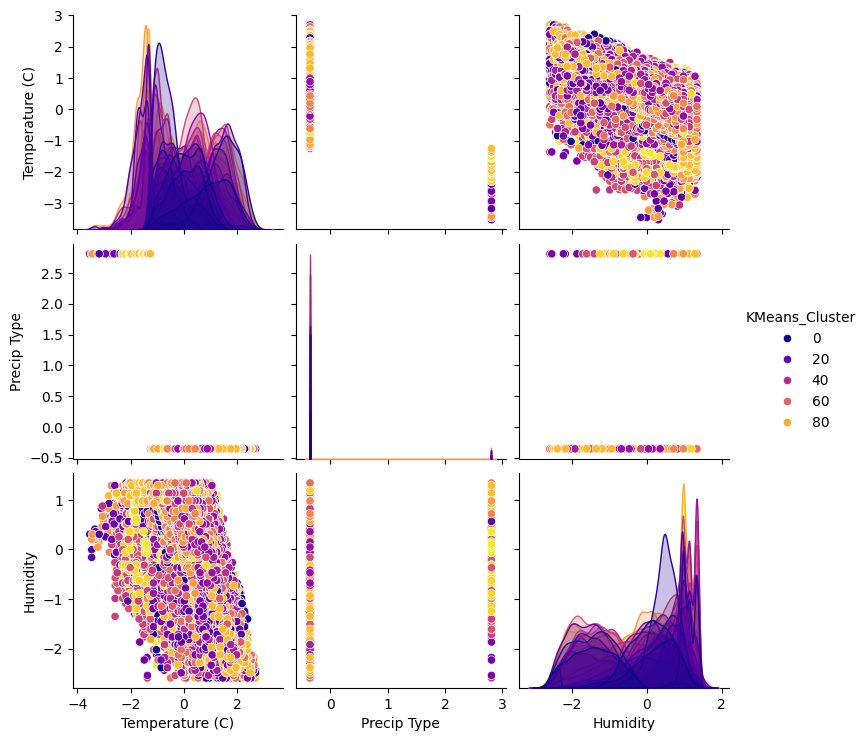

In [74]:
sns.pairplot(norm_data, vars=['Temperature (C)', 'Precip Type', 'Humidity'], palette = "plasma", hue='KMeans_Cluster')
plt.show()

## Метод DBSCAN

Подберём оптимальное значение eps для метода DBSCAN

In [75]:
parameters = {'eps': np.linspace(0.1, 1.5, 15)} # диапазон значений для параметра eps
dbsc = DBSCAN()
silhouette_scorer = make_scorer(silhouette_score) # метрика для оценки качества кластеризации
clf = GridSearchCV(dbsc, parameters, verbose=2, cv=2, scoring=silhouette_scorer)
clf.fit(X)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] END ............................................eps=0.1; total time=  10.6s
[CV] END ............................................eps=0.1; total time=   8.0s
[CV] END ............................................eps=0.2; total time=   8.6s
[CV] END ............................................eps=0.2; total time=   7.1s
[CV] END ............................................eps=0.3; total time=   8.6s
[CV] END ............................................eps=0.3; total time=   7.1s
[CV] END ............................................eps=0.4; total time=   8.6s
[CV] END ............................................eps=0.4; total time=   8.4s
[CV] END ............................................eps=0.5; total time=   7.2s
[CV] END ............................................eps=0.5; total time=   8.6s
[CV] END ............................................eps=0.6; total time=   7.2s
[CV] END .......................................

GridSearchCV(cv=2, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5])},
             scoring=make_scorer(silhouette_score, response_method='predict'),
             verbose=2)

Выведем оптимальный параметр

In [76]:
clustersCount_dbscan = clf.best_params_.setdefault('eps')
clf.best_params_

{'eps': 0.1}

Применим метод DBSCAN с оптимальным параметром

In [84]:
dbscan = DBSCAN(eps=clustersCount_dbscan)
norm_data['DBSCAN_Cluster'] = dbscan.fit_predict(X)
silhouette_dbscan = silhouette_score(X, norm_data['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for DBSCAN: 0.045136195652683196


Визуализируем полученное

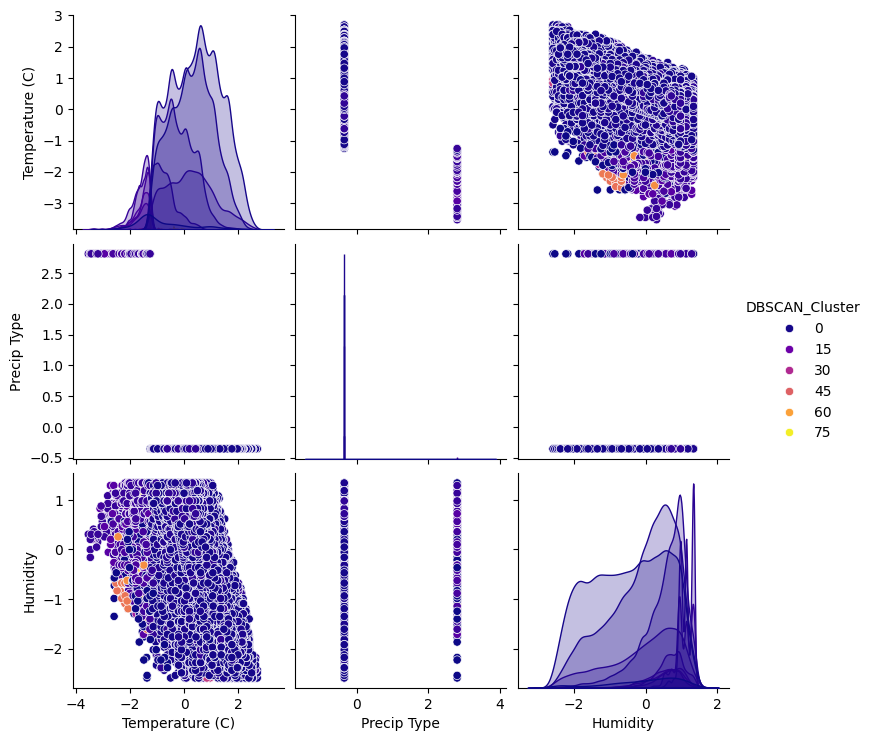

In [85]:
sns.pairplot(norm_data, vars=['Temperature (C)', 'Precip Type', 'Humidity'], palette='plasma', hue='DBSCAN_Cluster')
plt.show()

## Метод GaussianMixtureModel

Подберём оптимальное значение компонентов для метода GaussianMixtureModel

In [91]:
parameters = {'n_components': list(range(20, 30))}
gmm = GaussianMixture()
silhouette_scorer = make_scorer(silhouette_score)
clf = GridSearchCV(gmm, parameters, scoring=silhouette_scorer)
clf.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'n_components': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29]},
             scoring=make_scorer(silhouette_score, response_method='predict'))

Напечатаем оптимальный параметр

In [92]:
clustersCount_gmm = clf.best_params_.setdefault('n_components')
clf.best_params_

{'n_components': 20}

Применим метод GaussianMixtureModel с оптимальным параметром

In [93]:
gausmixmodel = GaussianMixture(n_components=clustersCount_gmm)
norm_data['GaussianMixture_Cluster'] = gausmixmodel.fit_predict(X)
silhouette_gausmixmodel = silhouette_score(X, norm_data['GaussianMixture_Cluster'])
print(f"Silhouette Score for GaussianMixtureModel: {silhouette_gausmixmodel}")

Silhouette Score for GaussianMixtureModel: 0.13061868819241393


Визуализируем полученное

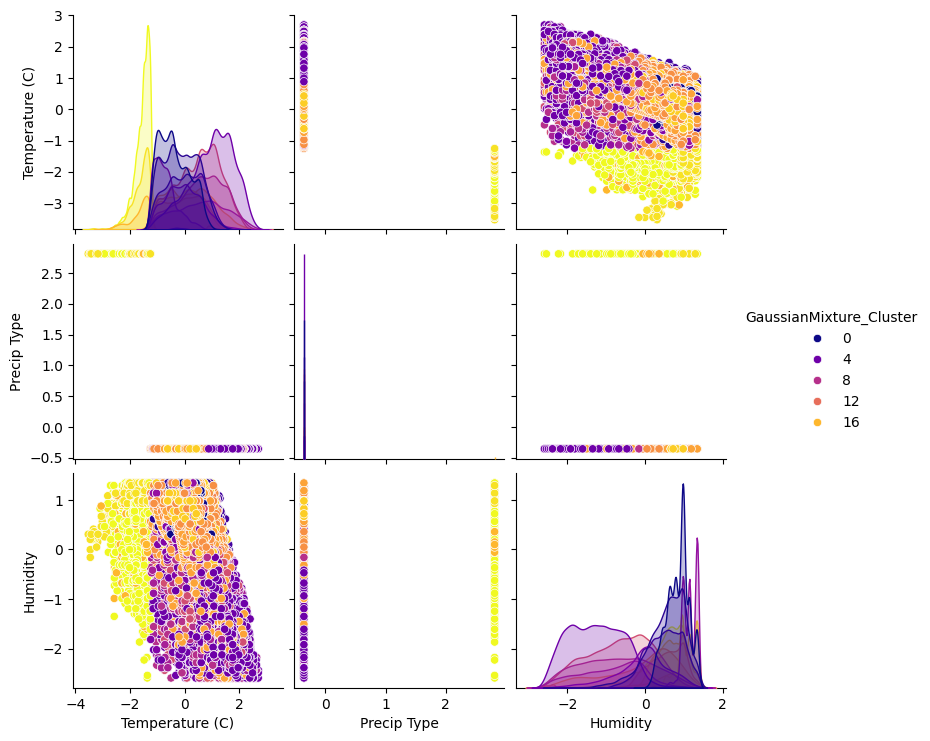

In [95]:
sns.pairplot(norm_data, vars=['Temperature (C)', 'Precip Type', 'Humidity'], palette='plasma', hue='GaussianMixture_Cluster')
plt.show()

# Итоги по задаче кластеризации

Я применила три различных метода кластеризации (KMeans, DBSCAN и Gaussian Mixture Model (GMM)), и получила следующие результаты:

### KMeans

Силуэтный коэффициент: 0.1635

Коэффициент близок к нулю, что указывает на слабую разделенность кластеров. Кластеры не выделяются четко, что подтверждается широкими и перекрывающимися распределениями на гистограммах.

### DBSCAN

Силуэтный коэффициент: 0.0451

Силуэтный коэффициент еще ниже, чем у KMeans (близок к 0), что указывает на ещё более слабую разделенность кластеров. На графиках видно, что большинство точек помечены как шум (обозначены одним цветом), что говорит о том, что DBSCAN не смог найти четких кластеров (они практически отсутствуют).

### Gaussian Mixture Model (GMM)

Силуэтный коэффициент: 0.1306

Силуэтный коэффициент также низкий, что указывает на слабую разделенность кластеров. На графиках видно, что кластеры перекрываются, но распределение более гладкое по сравнению с KMeans.

## Заключение
Наилучший коэффициент у метода KMeans, однако все три метода показывают низкие значения силуэтного коэффициента, что указывает на слабую разделенность кластеров. Это может говорить о том, что данные не имеют четкой кластеризованной структуры, либо что есть более оптимальные параметры, лежащие в другом диапазоне. На всех графиках видно, что кластеры перекрываются, что также подтверждает слабую разделенность. Метод DBSCAN показал, что большинство точек данных являются шумом, что может указывать на наличие значительного количества выбросов или на то, что данные не подходят для кластеризации. Также он не смог найти четких кластеров, что может быть связано с его чувствительностью к параметрам. В свою очередь, методы KMeans и GMM показали схожие результаты, но GMM дал более гладкое распределение.